In [ ]:
!pip install gradio -q
import gradio
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 113.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.3 MB/

In [ ]:
from google.colab import drive
drive.mount('\content\drive')

In [ ]:
labels = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
index = {v: k for k, v in labels.items()}
index

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [ ]:
def prepare_image(img):
    img = img.resize((224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [ ]:
model=tf.keras.models.load_model('/content/contentdrive/MyDrive/humanEmotion.keras')

In [ ]:
hc=cv.CascadeClassifier('/content/contentdrive/MyDrive/haarcascade_frontalface_default.xml')

In [ ]:
def detect_face(frame):
  gray=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
  faces=hc.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv.CASCADE_SCALE_IMAGE)
  for (x,y,w,h) in faces:
    cv.rectangle(gray,(x,y),(x+w,y+h),(0,255,0),2)
    face=gray[y:y+h,x:x+w]
    face=cv.resize(face,(224,224))
    face=face.astype('float')/255.0
    face=np.array(face)
    face=np.expand_dims(face,axis=0)
    #expand_image=np.expand_dims(face,axis=-1)
    #output_image=np.concatenate([expand_image,expand_image,expand_image],axis=-1)
    pred=np.argmax(model.predict(face))
    label=index[pred]
    cv.putText(gray,label,(x,y-10),cv.FONT_HERSHEY_SIMPLEX,0.8,(0.255,0),2)
  return frame#output_image

In [ ]:
img=cv.imread('/content/contentdrive/MyDrive/fear7.jpg')

In [ ]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)


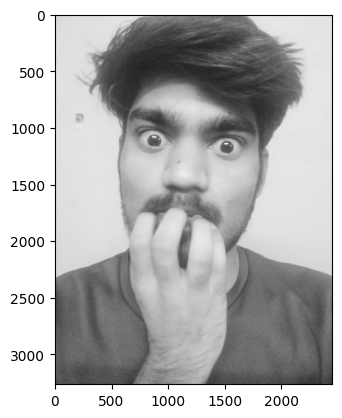

In [ ]:
plt.imshow(gray,cmap='gray')

In [ ]:
faces=hc.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv.CASCADE_SCALE_IMAGE)

In [ ]:
faces

array([[ 306,  417, 1688, 1688]], dtype=int32)

In [ ]:
for (x,y,w,h) in faces:
  face=gray[y:y+h,x:x+w]
  face=cv.resize(face,(224,224))
  face=face.astype('float')/255.0
  face=np.array(face)
  face=np.expand_dims(face,axis=0)
  face=np.expand_dims(face,axis=-1)
  final_face=np.concatenate([face,face,face],axis=-1)
  pred=np.argmax(model.predict(final_face))
  text=index[pred]

1/1 [==============================] - 0s 35ms/step


In [ ]:
text

'fear'

In [ ]:
def prediction(frame):
  gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  faces=hc.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv.CASCADE_SCALE_IMAGE)
  for (x,y,w,h) in faces:
    face=gray[y:y+h,x:x+w]
    face=cv.resize(face,(224,224))
    face=face.astype('float')/255.0
    face=np.array(face)
    face=np.expand_dims(face,axis=0)
    face=np.expand_dims(face,axis=-1)
    final_face=np.concatenate([face,face,face],axis=-1)
    pred=np.argmax(model.predict(final_face))
    text=index[pred]
    cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    cv.putText(frame,text,(x,y-10),cv.FONT_HERSHEY_SIMPLEX,5,(0,255,0),3)
    pil_image = Image.fromarray(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
  return pil_image

In [ ]:
frame=prediction(img)

1/1 [==============================] - 0s 46ms/step


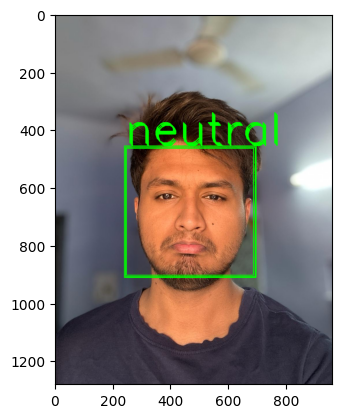

In [ ]:
plt.imshow(frame)

In [ ]:
interface=gradio.Interface(fn=prediction,inputs=gradio.Video(),outputs=gradio.Video(),live=True)

In [ ]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ef109bc7461322da14.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
interface2=gradio.Interface(fn=prediction,inputs=gradio.Image(),outputs=gradio.Image())

In [ ]:
interface2.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://610aafcd91f4e83281.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
img=cv.imread('/content/contentdrive/MyDrive/surprised7.jpg')

1/1 [==============================] - 0s 23ms/step


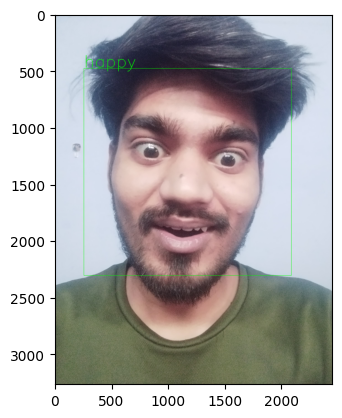

In [ ]:
plt.imshow(prediction(img))